<a href="https://colab.research.google.com/github/rnlima8/Aula_do_dia_06out/blob/main/exercicioJJNB15_02__Regress%C3%A3o%2520Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b><i>MACHINE LEARNING WITH PYTHON</i></b></h1></center>
<center><h1><b><i>APRENDIZAGEM SUPERVISIONADA</i></b></h1></center>
<center><h1><b><i>MODELOS DE REGRESSÃO (LINEAR E LOGÍSTICA)</i></b></h1></center>

Fonte: https://realpython.com/linear-regression-in-python/

Passos para implementação da Regressão Linear:

* (1) Importar as libraries necessárias;
* (2) Carregar os dados;
* (3) Aplicar as transformações necessárias: outliers, NaN's, normalização (MinMaxScaler, RobustScaler, StandarScaler, Log, Box-Cox e etc);
* (4) Construir e treinar o modelo preditivo (neste caso, modelo de regressão);
* (5) Validar/verificar as métricas para avaliação do(s) modelo(s);
* (6) Predições.

# Melhorias da sessão:
* 

# Modelos de Regressão com Regularization para Classificação e Regressão

## Regressão Linear Simples (usando OLS - Ordinary Least Squares)

* Features $X_{np}$: é uma matriz de dimensão nxp;
* Variável target/dependente representada por y;
* Relação entre X e y é representado pela equação abaixo, onde $w_{i}$ representa os pesos de cada coeficiente e $w_{0}$ representa o intercepto.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/lm1.PNG?raw=true" width="300">

![X_y](https://github.com/MathMachado/Materials/blob/master/Architecture.png?raw=true)

* Soma de Quadrados dos Resíduos (RSS) - Soma de Quadrados das diferenças entre os valores observados e preditos.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/lm2.PNG?raw=true" width="500">

## Principais parâmetros do algoritmo:
* fit_intercept - Indica se o intercepto $w_{0}$ deve ou não ser ajustado. Se os dados estão normalizados, então não faz sentido ajustar o intercepto $w_{0}$.

* normalize - $X$ será automaticamente normalizada (subtrai a média e divide pelo desvio-padrão);

## Atributos do modelo de Machine Learning para Regressão
* coef - peso/fator de cada variável independente do modelo de ML;

* intercepto $w_{0}$ - intercepto ou viés de $y$;

## Funções para ajuste do ML:
* fit - treina o modelo com as matrizes $X$ e $y$;
* predict - Uma vez que o modelo foi treinado, para um dado $X$, use $y$ para calcular os valores preditos de $y$ (y_pred).

<hr/>

# Limitações do OLS:
* Impactado/sensível à Outliers;
* Multicolinearidade; 
* Heterocedasticidade - apresenta-se como uma forte dispersão dos dados em torno de uma reta;

* <a href="http://www.clockbackward.com/2009/06/18/ordinary-least-squares-linear-regression-flaws-problems-and-pitfalls/">References</a>

### Importar as libraries

In [ ]:
import numpy as np
from numpy import quantile
import pandas as pd
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

### Carregar os dados
* Vamos carregar o dataset [Boston House Pricing](https://archive.ics.uci.edu/ml/datasets/housing)

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
#url = 'https://raw.githubusercontent.com/MathMachado/DSWP/master/Dataframes/housing.csv'

# Variáveis preditoras
df_boston = pd.DataFrame(load_boston().data, columns = load_boston().feature_names)
df_boston['preco'] = load_boston().target
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,preco
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#normalizando as features
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'preco'],
      dtype='object')

In [ ]:
#normalização das colunas
df_boston.columns= [cols.lower() for cols in df_boston.columns]
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,preco
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#check a somatória de NAN 
df_boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
preco      0
dtype: int64

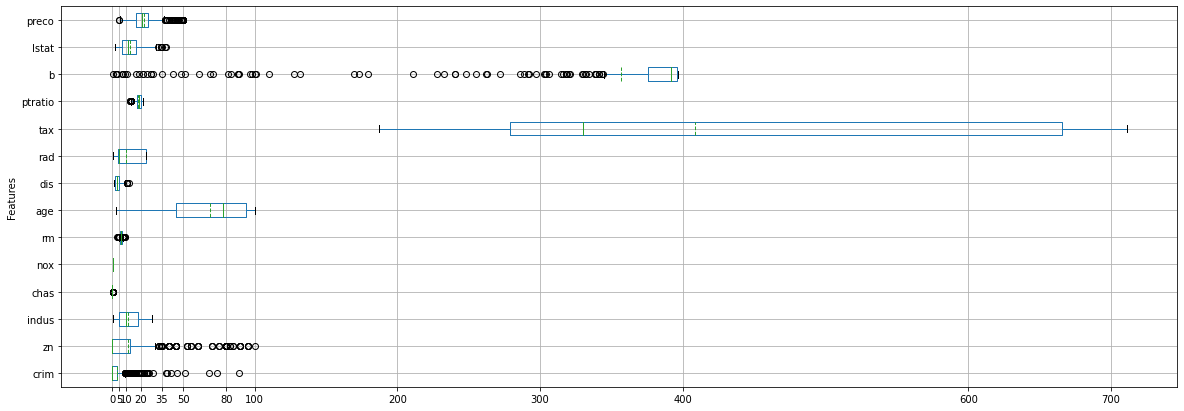

In [ ]:
#check nas features antes da transfromação
df_boston.plot(kind = 'box', showmeans = True, meanline = True, grid = True
             , figsize = (20,7), vert = False, ylabel = 'Features'
             , xticks =(0,5,10,20,35,50, 80, 100, 200, 300, 400, 600, 700))

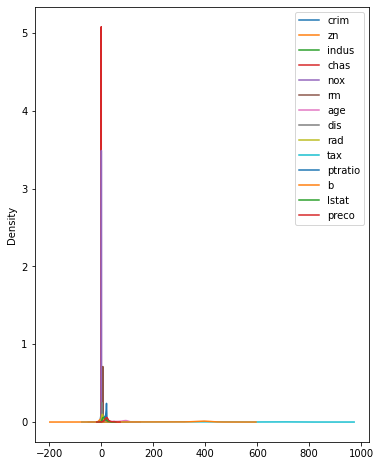

In [ ]:
df_boston.plot(kind = 'kde', figsize = (6,8))

In [ ]:
df_boston.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,preco
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df_boston.info

<bound method DataFrame.info of         crim    zn  indus  chas    nox  ...    tax  ptratio       b  lstat  preco
0    0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67   22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08   20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64   23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.48   22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.9

In [ ]:
df_boston['crim'].mean()

1.3574136429133836

In [ ]:
Q1 = df_boston.quantile(q=0.25)
Q1

crim         0.082045
zn           0.000000
indus        5.190000
chas         0.000000
nox          0.449000
rm           5.885500
age         45.025000
dis          2.100175
rad          4.000000
tax        279.000000
ptratio     17.400000
b          375.377500
lstat        6.950000
preco       17.025000
Name: 0.25, dtype: float64

In [ ]:
Q3 = df_boston.quantile(q=0.75)
Q3

crim         3.677083
zn          12.500000
indus       18.100000
chas         0.000000
nox          0.624000
rm           6.623500
age         94.075000
dis          5.188425
rad         24.000000
tax        666.000000
ptratio     20.200000
b          396.225000
lstat       16.955000
preco       25.000000
Name: 0.75, dtype: float64

In [ ]:
IQR = df_boston.quantile(q=0.75) - df_boston.quantile(q=0.25)
IQR

crim         3.595038
zn          12.500000
indus       12.910000
chas         0.000000
nox          0.175000
rm           0.738000
age         49.050000
dis          3.088250
rad         20.000000
tax        387.000000
ptratio      2.800000
b           20.847500
lstat       10.005000
preco        7.975000
dtype: float64

In [ ]:
Linf = Q1 - (1.5*IQR)
Linf

crim        -5.310511
zn         -18.750000
indus      -14.175000
chas         0.000000
nox          0.186500
rm           4.778500
age        -28.550000
dis         -2.532200
rad        -26.000000
tax       -301.500000
ptratio     13.200000
b          344.106250
lstat       -8.057500
preco        5.062500
dtype: float64

In [ ]:
Lsup = Q3 + (1.5*IQR)
Lsup

crim          9.069639
zn           31.250000
indus        37.465000
chas          0.000000
nox           0.886500
rm            7.730500
age         167.650000
dis           9.820800
rad          54.000000
tax        1246.500000
ptratio      24.400000
b           427.496250
lstat        31.962500
preco        36.962500
dtype: float64

In [ ]:
l_col = df_boston.columns
l_col

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'preco'],
      dtype='object')

In [ ]:
df_boston['crim'].mean()

3.6135235573122535

In [ ]:
#l_col1 = ['crim']
for col in l_col:
    #print(df_boston[col])  
    for c in range(0, len(df_boston[col])):
        #print(df_boston[col][c])  
        if df_boston[col][c] > Lsup[col]:
            df_boston[col][c] = df_boston[col].mean()
        if df_boston[col][c] < Linf[col]:
            df_boston[col][c] = df_boston[col].mean()    
        

In [ ]:
df_boston['crim']

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: crim, Length: 506, dtype: float64

In [ ]:
df_boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,preco
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.357414,3.765903,11.136779,0.002574,0.554695,6.233580,68.574901,3.724123,9.549407,408.237154,18.621949,385.679994,12.343050,20.792468
std,2.043254,7.462902,6.860353,0.010717,0.115878,0.517523,28.148861,1.979778,8.707259,168.537116,1.936122,13.050351,6.631241,6.197593
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.880000,2.900000,1.129600,1.000000,187.000000,13.600000,344.910000,1.730000,5.600000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.899750,45.025000,2.100175,4.000000,279.000000,17.400000,377.691163,6.950000,17.100000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.211500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.008876
75%,1.915668,4.707208,18.100000,0.000000,0.624000,6.515250,94.075000,5.112625,24.000000,666.000000,20.200000,396.225000,16.462500,23.800000
max,8.982960,30.000000,27.740000,0.069170,0.871000,7.691000,100.000000,9.222900,24.000000,711.000000,22.000000,396.900000,30.810000,36.500000


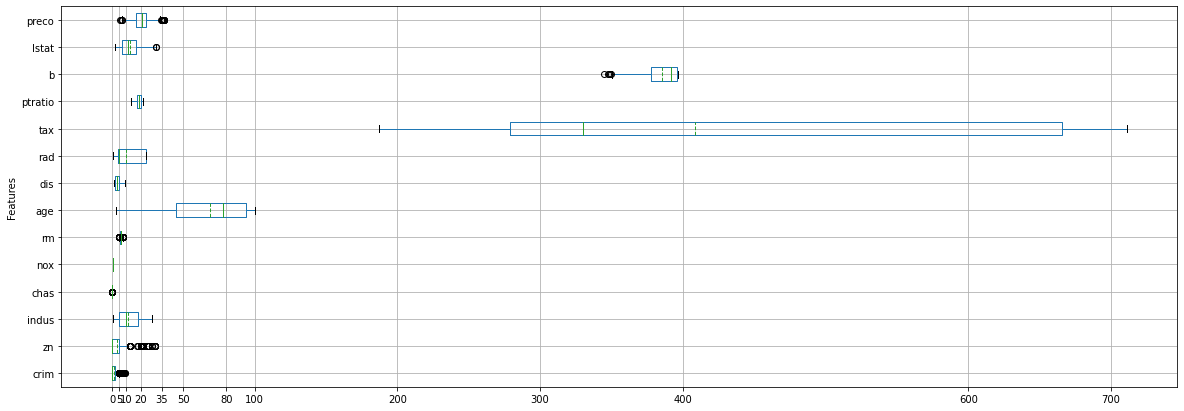

In [ ]:
#check nas features antes da transfromação
df_boston.plot(kind = 'box', showmeans = True, meanline = True, grid = True
             , figsize = (20,7), vert = False, ylabel = 'Features'
             , xticks =(0,5,10,20,35,50, 80, 100, 200, 300, 400, 600, 700))

In [ ]:
#colunas do df_boston
l_col = df_boston.columns
l_col

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'preco'],
      dtype='object')

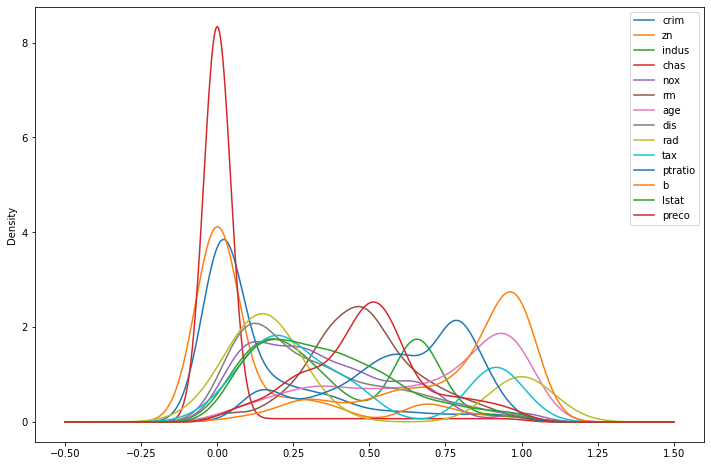

In [ ]:
#aplicando a tranformação
boston_MinMaxScaler = MinMaxScaler().fit_transform(df_boston)
df_boston_MinMaxScaler = pd.DataFrame(boston_MinMaxScaler,columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'preco'])

# Gráfico
df_boston_MinMaxScaler.plot(kind = 'kde', figsize = (12,8))

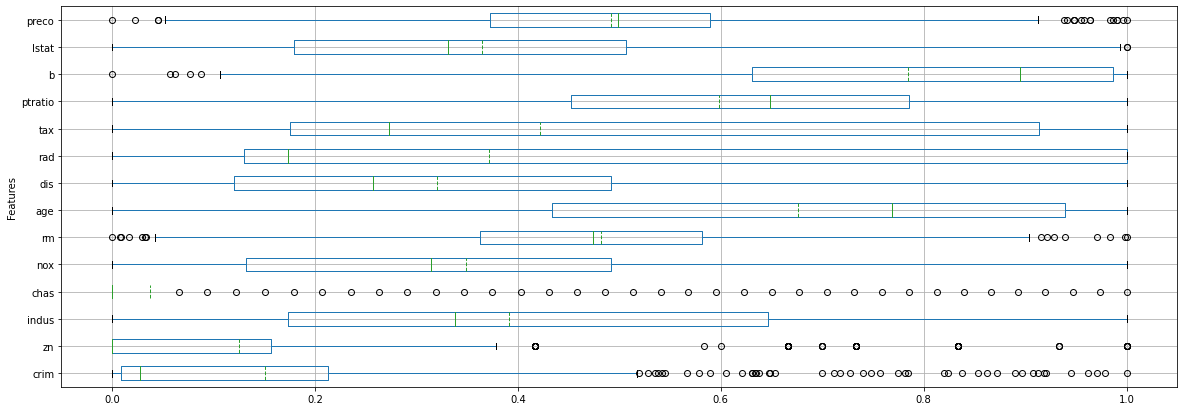

In [ ]:
#check as features após a transformação
df_boston_MinMaxScaler.plot(kind = 'box', showmeans = True, meanline = True, grid = True
             , figsize = (20,7), vert = False, ylabel = 'Features')

In [ ]:
df_boston_MinMaxScaler.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,preco
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.150512,0.125530,0.391378,0.037206,0.349167,0.481530,0.676364,0.320577,0.371713,0.422208,0.597851,0.784189,0.364960,0.491666
std,0.227619,0.248763,0.251479,0.154933,0.238431,0.184107,0.289896,0.244619,0.378576,0.321636,0.230491,0.251017,0.228034,0.200569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.008436,0.000000,0.173387,0.000000,0.131687,0.362771,0.433831,0.119923,0.130435,0.175573,0.452381,0.630528,0.179505,0.372168
50%,0.027871,0.000000,0.338343,0.000000,0.314815,0.473675,0.768280,0.256737,0.173913,0.272901,0.648810,0.894980,0.331155,0.498669
75%,0.212702,0.156907,0.646628,0.000000,0.491770,0.581732,0.938980,0.492139,1.000000,0.914122,0.785714,0.987017,0.506620,0.588997
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_boston_1 = df_boston_MinMaxScaler.copy()

In [ ]:
df_boston_1.shape

(506, 14)

In [ ]:
#drop preço do df_boston, seperando-a
X_boston = df_boston_1.drop(columns = ['preco'], axis = 1)
y_boston = df_boston_1['preco']

In [ ]:
X_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.000000,0.6,0.067815,0.0,0.314815,0.602988,0.641607,0.365784,0.000000,0.208015,0.202381,1.000000,0.111761
1,0.002338,0.0,0.242302,0.0,0.172840,0.548203,0.782698,0.474158,0.043478,0.104962,0.500000,1.000000,0.254814
2,0.002336,0.0,0.242302,0.0,0.172840,0.819993,0.599382,0.474158,0.043478,0.104962,0.500000,0.921716,0.079092
3,0.002902,0.0,0.063050,0.0,0.150206,0.753469,0.441813,0.609467,0.086957,0.066794,0.607143,0.956338,0.041609
4,0.006988,0.0,0.063050,0.0,0.150206,0.806475,0.528321,0.609467,0.086957,0.066794,0.607143,1.000000,0.123796


In [ ]:
y_boston

0      0.595469
1      0.517799
2      0.941748
3      0.899676
4      0.990291
         ...   
501    0.543689
502    0.485437
503    0.592233
504    0.530744
505    0.203883
Name: preco, Length: 506, dtype: float64

In [ ]:
#matriz de correlação
correlacoes = df_boston.corr()
correlacoes

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,preco
crim,1.000000,-0.295162,0.588655,-0.014841,0.625434,-0.151322,0.458455,-0.488797,0.797086,0.761196,0.332184,-0.250042,0.395124,-0.423200
zn,-0.295162,1.000000,-0.446895,-0.061900,-0.396811,0.254585,-0.378445,0.520028,-0.270816,-0.359608,-0.251374,0.169226,-0.320980,0.327165
indus,0.588655,-0.446895,1.000000,0.072817,0.763651,-0.371376,0.644779,-0.704480,0.595129,0.720760,0.332144,-0.316099,0.599086,-0.587373
chas,-0.014841,-0.061900,0.072817,1.000000,0.100920,-0.035579,0.098094,-0.090664,-0.088627,-0.089806,-0.229175,-0.040222,0.011849,0.055430
nox,0.625434,-0.396811,0.763651,0.100920,1.000000,-0.305767,0.731470,-0.773815,0.611441,0.668023,0.234990,-0.332659,0.589775,-0.557076
rm,-0.151322,0.254585,-0.371376,-0.035579,-0.305767,1.000000,-0.258570,0.248824,-0.125438,-0.208653,-0.175433,0.152428,-0.530714,0.567371
age,0.458455,-0.378445,0.644779,0.098094,0.731470,-0.258570,1.000000,-0.742173,0.456022,0.506456,0.307892,-0.236587,0.601298,-0.533419
dis,-0.488797,0.520028,-0.704480,-0.090664,-0.773815,0.248824,-0.742173,1.000000,-0.504133,-0.551650,-0.316034,0.253852,-0.480916,0.440055
rad,0.797086,-0.270816,0.595129,-0.088627,0.611441,-0.125438,0.456022,-0.504133,1.000000,0.910228,0.468467,-0.238797,0.463429,-0.494158
tax,0.761196,-0.359608,0.720760,-0.089806,0.668023,-0.208653,0.506456,-0.551650,0.910228,1.000000,0.448557,-0.276187,0.523002,-0.572956


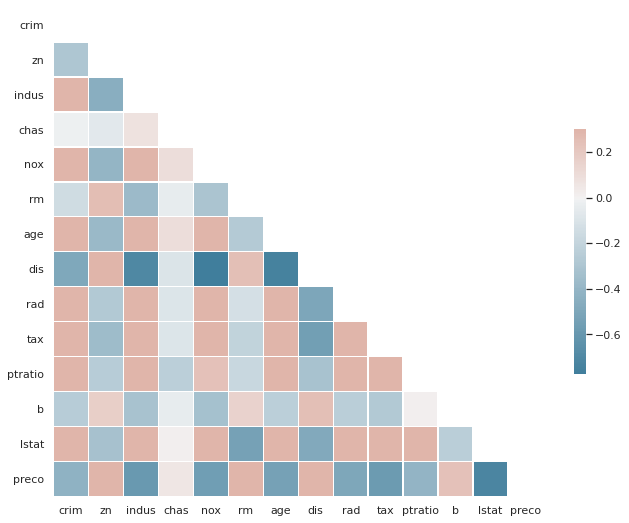

In [ ]:
#grafico
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt

sns.set_theme(style = "white")

d = df_boston

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# Definindo os dataframes de treinamento e teste:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_boston, y_boston,
                                                                  test_size = 0.2, random_state = 20111974)

In [ ]:
#Treinamento do modelo de Regressão Linear
# Importa a library LinearRegression --> Para treinamento da Regressão Linear
from sklearn.linear_model import LinearRegression

# Library para statmodels
import statsmodels.api as sm


In [ ]:
# Instancia o objeto
regressao_linear = LinearRegression()

In [ ]:
# Treina o modelo usando as amostras/dataset de treinamento: X_treinamento e y_treinamento 
regressao_linear.fit(X_treinamento, y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Valor do intercepto
regressao_linear.intercept_

0.6775956584166337

In [ ]:
# Coeficientes do modelo de Regressão Linear
coeficientes_regressao_linear = pd.DataFrame([X_treinamento.columns, regressao_linear.coef_]).T
coeficientes_regressao_linear = coeficientes_regressao_linear.rename(columns={0: 'Feature/variável/coluna', 1: 'Coeficientes'})
coeficientes_regressao_linear

,Feature/variável/coluna,Coeficientes
0,crim,0.0386056
1,zn,0.0124553
2,indus,-0.0279014
3,chas,0.0475162
4,nox,-0.0763647
5,rm,0.289945
6,age,-0.0862409
7,dis,-0.111448
8,rad,0.0404656
9,tax,-0.179776


In [ ]:
X2_treinamento = sm.add_constant(X_treinamento)
lm_sm = sm.OLS(y_treinamento, X2_treinamento).fit()
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     54.39
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           3.52e-79
Time:                        03:49:33   Log-Likelihood:                 290.46
No. Observations:                 404   AIC:                            -552.9
Df Residuals:                     390   BIC:                            -496.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6776      0.051     13.168      0.0

### Data Transformation

#### Normalização/padronização dos nomes das colunas

In [ ]:
df_boston.columns = [col.lower() for col in df_boston.columns]

In [ ]:
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,preco
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Outliers

#### Missing values

In [ ]:
# Missing values por colunas/variáveis
df_boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
preco      0
dtype: int64

In [ ]:
# Missing Values por linhas
df_boston[df_boston.isnull().any(axis = 1)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,preco


#### Estatísticas Descritivas

In [ ]:
df_boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,preco
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Análise de Correlação

In [ ]:
correlacoes = df_boston.corr()
correlacoes

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,preco
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


##### Gráfico das correlações entre as features/variáveis/colunas
Source: https://seaborn.pydata.org/examples/many_pairwise_correlations.html



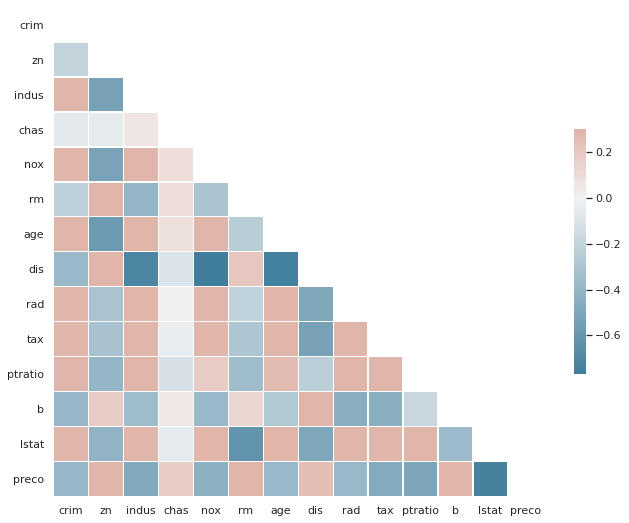

In [ ]:
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt

sns.set_theme(style = "white")

d = df_boston

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Construir e treinar o(s) modelo(s)

In [ ]:
X_boston = df_boston.drop(columns = ['preco'], axis = 1)
y_boston = df_boston['preco']

In [ ]:
# Definindo os dataframes de treinamento e teste:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_boston, y_boston, test_size = 0.2, random_state = 20111974)

#### Treinamento do modelo de Regressão Linear

In [ ]:
# Importa a library LinearRegression --> Para treinamento da Regressão Linear
from sklearn.linear_model import LinearRegression

# Library para statmodels
import statsmodels.api as sm

In [ ]:
# Instancia o objeto
regressao_linear = LinearRegression()

In [ ]:
# Treina o modelo usando as amostras/dataset de treinamento: X_treinamento e y_treinamento 
regressao_linear.fit(X_treinamento, y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Valor do intercepto
regressao_linear.intercept_

35.9020918753502

In [ ]:
# Coeficientes do modelo de Regressão Linear
coeficientes_regressao_linear = pd.DataFrame([X_treinamento.columns, regressao_linear.coef_]).T
coeficientes_regressao_linear = coeficientes_regressao_linear.rename(columns={0: 'Feature/variável/coluna', 1: 'Coeficientes'})
coeficientes_regressao_linear

,Feature/variável/coluna,Coeficientes
0,crim,-0.0822083
1,zn,0.0428002
2,indus,0.0756011
3,chas,3.16348
4,nox,-19.4945
5,rm,3.98161
6,age,0.00480929
7,dis,-1.37396
8,rad,0.298883
9,tax,-0.0123962


#### Usando statmodels

In [ ]:
X2_treinamento = sm.add_constant(X_treinamento)
lm_sm = sm.OLS(y_treinamento, X2_treinamento).fit()
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     78.97
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.48e-100
Time:                        18:26:11   Log-Likelihood:                -1214.8
No. Observations:                 404   AIC:                             2458.
Df Residuals:                     390   BIC:                             2514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.9021      6.037      5.947      0.0

### Conclusão
* Quais variáveis/colunas/atributos ficam no modelo?

### Validação do(s) modelo(s)

### Predições

# Regularized Regression Methods 
## Ridge Regression - Penalized Regression
> Reduz a complexidade do modelo através do uso de todas as variáveis de $X$, mas penalizando (valor de $\alpha$) os coeficientes $w_{i}$ quando estiverem muito longe de zero, forçando-os a serem pequenos de maneira contínua. Dessa forma, diminuímos a complexidade do modelo enquanto mantemos todas as variáveis no modelo.
* Menor impacto dos outliers.

### Exemplo

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = .1)
lr = LinearRegression()

In [ ]:
ridge = Ridge(alpha = .1)
ridge.fit(X_treinamento, y_treinamento)

array([-8.08728088e-02,  4.31105323e-02,  6.96774448e-02,  3.14478949e+00,
       -1.79983020e+01,  3.98675653e+00,  3.54464890e-03, -1.35303958e+00,
        2.95042916e-01, -1.25115273e-02, -9.68282109e-01,  9.02744064e-03,
       -5.29135646e-01])

#### Peso/contribuição das variáveis para a regressão usando RIDGE

In [ ]:
ridge.coef_

In [ ]:
# treinando a regressão Ridge
ridge.fit(X_treinamento, y_treinamento)

# treinando a regressão linear simples (OLS)
lr.fit(X_treinamento, y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ridge.alpha

0.1

In [ ]:
# maior alpha --> mais restrição aos coeficientes; 
# Menor alpha --> mais generalização, e Ridge se assemelha da OLS
rr = Ridge(alpha = 0.01)
rr.fit(X_treinamento, y_treinamento)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
# MSE
rr_model=(mean_squared_error(y_true = y_treinamento, y_pred = rr.predict(X_treinamento)))
print(rr_model)

23.94639697817076


In [ ]:
rr100 = Ridge(alpha=100)
rr100.fit(X_treinamento, y_treinamento)
train_score=lr.score(X_treinamento, y_treinamento)
test_score=lr.score(X_teste, y_teste)
Ridge_treinamento_score = rr.score(X_treinamento,y_treinamento)

In [ ]:
# MSE
rr100_model = (mean_squared_error(y_true = y_treinamento, y_pred = rr100.predict(X_treinamento)))
print(rr100_model)

26.4601050898885


# Lasso
* Reduz overfitting;
* Se encarrega do Feature Selection, pois descarta variáveis altamente correlacionadas.

* Usado no processo de Regularization - processo de penalizar as variáveis para manter somente os atributos mais importantes. Pense na utilidade disso diante de um dataframe com muitas variáveis;
* A regressão Lasso vem com um parâmetro ($\alpha$), e quanto maior o alfa, a maioria dos coeficientes de recurso é zero. Ou seja, quando $\alpha = 0$, a regressão Lasso produz os mesmos coeficientes que uma regressão linear. Quando alfa é muito grande, todos os coeficientes são zero.

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = .1)
lasso.fit(X_treinamento, y_treinamento)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.coef_

array([-6.53050169e-02,  4.69929493e-02,  2.03045631e-03,  1.56638852e+00,
       -0.00000000e+00,  3.77954671e+00, -6.40432403e-03, -1.06129312e+00,
        2.58073061e-01, -1.42708307e-02, -7.81773992e-01,  9.95091849e-03,
       -5.87452824e-01])

Coeficientes zero podem ser excluídos da Análise/modelo.

# Elastic Net  
* Combina o poder de Ridge e LASSO;
* Remove variáveis de pouco poder preditivo (LASSO) ou as penaliza (Ridge).

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Instancia o objeto
en = ElasticNet(alpha = .1)

In [ ]:
en.fit(X_treinamento, y_treinamento)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
en.coef_

array([-7.14375105e-02,  4.98062892e-02,  3.25764298e-03,  1.32398367e+00,
       -1.16648025e-01,  3.29040345e+00, -3.09984870e-03, -1.07673872e+00,
        2.80823236e-01, -1.50703816e-02, -8.13376450e-01,  9.70397656e-03,
       -6.21886279e-01])

In [ ]:
# Instancia o objeto:
en = ElasticNet(normalize = True)

# Otimização dos hiperparâmetros:
d_hiperparametros = {'alpha': np.logspace(-5, 2, 8), 
                     'l1_ratio': [.2, .4, .6, .8]}

search = GridSearchCV(estimator = en, 
                      param_grid = d_hiperparametros, 
                      scoring = 'neg_mean_squared_error', 
                      n_jobs = 1,
                      refit = True, 
                      cv = 10)

In [ ]:
search.fit(X_treinamento, y_treinamento)
search.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.4}

In [ ]:
en2 = ElasticNet(normalize = True, alpha = 0.001, l1_ratio = 0.6)
en2.fit(X_treinamento, y_treinamento)

# Métrica
ml2 = (mean_squared_error(y_true = y_teste, y_pred = en2.predict(X_teste)))
print(ml2)

15.410850398354446


# Regularized Regression Methods 
## Ridge Regression - Penalized Regression
> Reduz a complexidade do modelo através do uso de todas as variáveis de $X$, mas penalizando os coeficientes $w_{i}$ quando estiverem muito longe de zero, forçando-os a serem pequenos de maneira contínua. Dessa forma, diminuímos a complexidade do modelo enquanto mantemos todas as variáveis no modelo.
* Menor impacto dos outliers.

### Exemplo

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = .1)
lr = LinearRegression()

In [ ]:
# Matriz de covariáveis do modelo:
X_new = [[0, 0], [0, 0], [1, 1]]
y_new = [0, .1, 1]

In [ ]:
X_new

In [ ]:
y_new

In [ ]:
ridge = Ridge(alpha = .1)
ridge.fit(X_new, y_new)
ridge.coef_

In [ ]:
# treinando a regressão Ridge
ridge.fit(X, y)

# treinando a regressão linear simples (OLS)
lr.fit(X, y)

In [ ]:
ridge.coef_

In [ ]:
lr.coef_

In [ ]:
# Adicionar alguns outliers aos dados
outliers = y[950:] - 600
outliers

In [ ]:
import numpy as np
y_outlier = np.append(y[:950], outliers)

In [ ]:
plt.scatter(X, y_outlier, s=5)

In [ ]:
lr = LinearRegression()
lr.fit(X, y_outlier)

In [ ]:
y_pred_outliers= lr.predict(X)

In [ ]:
plt.scatter(X, y_outlier,s=5,label='actual')
plt.scatter(X, y_pred_outliers,s=5,label='prediction with outliers')
plt.scatter(X, y_pred,s=5,c='k', label='prediction sem outlier')
plt.legend()
plt.title('Linear Regression')

In [ ]:
lr.coef_

In [ ]:
ridge = Ridge(alpha = 1000)

In [ ]:
ridge.fit(X, y_outlier)

In [ ]:
y_pred_ridge = ridge.predict(X)

In [ ]:
plt.scatter(X, y_outlier, s = 5,label = 'actual')
plt.scatter(X, y_pred_outliers, s = 5, c = 'r' ,label = 'LinearRegression with outliers')
plt.scatter(X, y_pred_ridge, s = 5, c = 'k', label = 'RidgeRegression with outlier')
plt.legend()
plt.title('Linear Regression')

In [ ]:
ridge.coef_

## Efeito de $\alpha$ na Regressão Ridge
### Exemplo

In [ ]:
X, y, w = make_regression(n_samples = 10, 
                          n_features = 10, 
                          coef = True, 
                          random_state = 1, 
                          bias = 3.5)

In [ ]:
w

# Lasso
* Reduz overfitting;
* Se encarrega do Feature Selection, pois descarta variáveis altamente correlacionadas.

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = .1)
lasso.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

In [ ]:
lasso.coef_

Observe acima que o segundo coeficiente foi estimado como 0 e, desta forma, podemos excluí-lo do ML.

# Elastic Net  
* Combina o poder de Ridge e LASSO;
* Remove variáveis de pouco poder preditivo (LASSO) ou as penaliza (Ridge).

In [ ]:
from sklearn.linear_model import ElasticNet

# Instancia o objeto
en = ElasticNet(alpha = .1)

In [ ]:
en.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

In [ ]:
en.coef_

# Exemplo completo: Ridge
* Adaptado de [Ridge and Lasso Regression: A Complete Guide with Python Scikit-Learn](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b)

In [ ]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [ ]:
boston = load_boston()
df_Boston = pd.DataFrame(boston.data, columns = boston.feature_names)

In [ ]:
X_boston = boston.data
y_boston = boston.target

In [ ]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_boston, y_boston, test_size = 0.2, random_state = 20111974)

In [ ]:
lr = LinearRegression()
lr.fit(X_treinamento, y_treinamento)

In [ ]:
# maior alpha --> mais restrição aos coeficientes; 
# Menor alpha --> mais generalização, e Ridge se assemelha da OLS
rr = Ridge(alpha = 0.01)
rr.fit(X_treinamento, y_treinamento)

In [ ]:
# MSE
rr_model=(mean_squared_error(y_true = y_treinamento, y_pred = rr.predict(X_treinamento)))
print(rr_model)

In [ ]:
rr100 = Ridge(alpha=100)
rr100.fit(X_treinamento, y_treinamento)
train_score=lr.score(X_treinamento, y_treinamento)
test_score=lr.score(X_teste, y_teste)
Ridge_treinamento_score = rr.score(X_treinamento,y_treinamento)

In [ ]:
# MSE
rr100_model = (mean_squared_error(y_true = y_treinamento, y_pred = rr100.predict(X_treinamento)))
print(rr100_model)

In [ ]:
Ridge_teste_score = rr.score(X_teste, y_teste)
Ridge_treinamento_score100 = rr100.score(X_treinamento, y_treinamento)
Ridge_teste_score100 = rr100.score(X_teste, y_teste)
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_treinamento_score)
print("ridge regression test score low alpha:", Ridge_teste_score)
print("ridge regression train score high alpha:", Ridge_treinamento_score100)
print("ridge regression test score high alpha:", Ridge_teste_score100)

In [ ]:
plt.plot(rr.coef_, 
         alpha = 0.7, 
         linestyle = 'none', 
         marker = '*', 
         markersize = 5, 
         color = 'red', 
         label = r'Ridge; 
         $\alpha = 0.01$', 
         zorder = 7) # zorder for ordering the markers

plt.plot(rr100.coef_,alpha = 0.5, 
         linestyle = 'none', 
         marker = 'd', 
         markersize = 6, 
         color = 'blue', 
         label = r'Ridge; 
         $\alpha = 100$') # alpha here is for transparency

plt.plot(lr.coef_, 
         alpha = 0.4, 
         linestyle = 'none', 
         marker = 'o', 
         markersize = 7, 
         color = 'green', 
         label = 'Linear Regression')

plt.xlabel('Coefficient Index', fontsize = 16)
plt.ylabel('Coefficient Magnitude',fontsize = 16)
plt.legend(fontsize = 13, loc = 4)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
rr_model=(mean_squared_error(y_true= y, y_pred=regression.predict(X)))
print(first_model)

# Exemplo completo - Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Instancia o objeto:
en = ElasticNet(normalize = True)

# Otimização dos hiperparâmetros:
d_hiperparametros = {'alpha': np.logspace(-5, 2, 8), 
                     'l1_ratio': [.2, .4, .6, .8]}

search = GridSearchCV(estimator = en, 
                      param_grid = d_hiperparametros, 
                      scoring = 'neg_mean_squared_error', 
                      n_jobs = 1,
                      refit = True, 
                      cv = 10)

In [ ]:
search.fit(X, y)
search.best_params_

In [ ]:
en2 = ElasticNet(normalize = True, alpha = 0.001, l1_ratio = 0.6)
en2.fit(X, y)

ml2 = (mean_squared_error(y_true = y, y_pred = en2.predict(X)))
print(ml2)

# Exercício 1 - Regressão Linear - Mall_Customers.csv
> A variável-target deste dataframe é 'Annual Income'. Desenvolva um modelo de regressão utilizando OLS, Ridge e LASSO e compare os resultados.

* Experimente:
    * Lasso(alpha = 0.01, max_iter = 10e5);
    * Lasso(alpha = 0.0001, max_iter = 10e5);
    * Ridge(alpha = 0.01);
    * Ridge(alpha = 100);

# Regressão Logística

# Exemplo para regressão LOGÍSTICA!!!

In [ ]:
# Carrega as bibliotecas
import numpy as np
np.set_printoptions(formatter = {'float': lambda x: "{0:0.2f}".format(x)})

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

%matplotlib inline

In [ ]:
# Carregar/ler o banco de dados - Dataframe Diabetes
from sklearn import datasets
#Diabetes = datasets.load_diabetes()

url = 'https://raw.githubusercontent.com/MathMachado/DSWP/master/Dataframes/diabetes.csv'
diabetes = pd.read_csv(url)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Definir as matrizes X e y
X_diabetes = diabetes.copy()
X_diabetes.drop(columns = ['Outcome'], axis = 1, inplace = True)
y_diabetes = diabetes['Outcome']

X_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
X_diabetes.shape

(768, 8)

In [ ]:
y_diabetes.shape

(442,)

In [ ]:
# Definir as matrizes de treinamento e validação
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_diabetes, y_diabetes)

In [ ]:
# Carregar a library LinearRegression()
from sklearn.linear_model import LinearRegression

# Instanciar o objeto
lr = LinearRegression()

# Usando statmodels:
x = sm.add_constant(X_treinamento)
lr_sm = sm.Logit(y_treinamento, X_treinamento) # Atenção: aqui é o contrário: [y, x]

# Treinar o modelo
lr.fit(X_treinamento, y_treinamento)
resultado_sm = lr_sm.fit()

Optimization terminated successfully.
         Current function value: 0.596920
         Iterations 5


In [ ]:
resultado_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  576
Model:                          Logit   Df Residuals:                      568
Method:                           MLE   Df Model:                            7
Date:                Mon, 26 Oct 2020   Pseudo R-squ.:                 0.05860
Time:                        13:23:03   Log-Likelihood:                -343.83
converged:                       True   LL-Null:                       -365.23
Covariance Type:            nonrobust   LLR p-value:                 3.632e-07
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1447      0.033      4.364      0.000       0.080       0.210
Glucose                      0.0116      0.003      3.614      0.000       0.005       0.018
BloodPressure               -0.0318      0.006     -5.574      0.000      -0.043      -0.021
SkinThickness                0.0022      0.007      0.300      0.764      -0.012       0.017
Insulin                      0.0014      0.001      1.476      0.140      -0.000       0.003
BMI                         -0.0012      0.013     -0.094      0.925      -0.027       0.025
DiabetesPedigreeFunction     0.0411      0.283      0.145      0.885      -0.514       0.596
Age                         -0.0145      0.010     -1.474      0.140      -0.034       0.005
============================================================================================
"""

In [ ]:
# Coeficientes do modelo
lr.coef_   

array([   10.50312025,  -263.32615982,   516.66778363,   356.84510148,
       -1037.40954808,   731.51011113,   121.62332809,   163.11261651,
         780.54426871,    66.11245968])

In [ ]:
# Intercepto do modelo
lr.intercept_

155.02945244919295

In [ ]:
# EQM - Erro Quadrático Médio
np.mean((lr.predict(X_teste) - y_teste) ** 2) 

2998.4466244258106

### Calcular y_pred - os valores preditos de y

In [ ]:
y_pred = lr.predict(X_treinamento)

# Predit com statmodels
resultado_sm.predict()

array([0.41, 0.34, 0.41, 0.35, 0.18, 0.16, 0.34, 0.56, 0.48, 0.26, 0.16,
       0.34, 0.19, 0.44, 0.23, 0.32, 0.29, 0.11, 0.59, 0.31, 0.33, 0.46,
       0.83, 0.42, 0.16, 0.83, 0.17, 0.40, 0.37, 0.37, 0.35, 0.38, 0.29,
       0.57, 0.37, 0.30, 0.53, 0.37, 0.13, 0.42, 0.93, 0.22, 0.32, 0.52,
       0.23, 0.49, 0.34, 0.20, 0.10, 0.27, 0.28, 0.35, 0.37, 0.27, 0.42,
       0.41, 0.32, 0.54, 0.32, 0.46, 0.32, 0.24, 0.62, 0.49, 0.26, 0.34,
       0.84, 0.60, 0.23, 0.44, 0.48, 0.22, 0.19, 0.23, 0.55, 0.35, 0.13,
       0.38, 0.27, 0.09, 0.44, 0.18, 0.23, 0.35, 0.30, 0.23, 0.36, 0.30,
       0.72, 0.25, 0.24, 0.25, 0.45, 0.75, 0.05, 0.20, 0.67, 0.34, 0.43,
       0.35, 0.32, 0.20, 0.15, 0.17, 0.33, 0.44, 0.52, 0.41, 0.49, 0.27,
       0.20, 0.33, 0.31, 0.41, 0.49, 0.46, 0.82, 0.68, 0.54, 0.30, 0.19,
       0.15, 0.23, 0.38, 0.41, 0.37, 0.32, 0.34, 0.44, 0.17, 0.10, 0.56,
       0.50, 0.32, 0.25, 0.24, 0.27, 0.36, 0.69, 0.40, 0.30, 0.55, 0.49,
       0.35, 0.44, 0.36, 0.30, 0.18, 0.41, 0.15, 0.

In [ ]:
np.array(diabetes['Outcome'])

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
resultado_sm.pred_table()

array([[343.00, 43.00],
       [129.00, 61.00]])

In [ ]:
confusion_matrix = pd.DataFrame(resultado_sm.pred_table())
confusion_matrix.columns = ['Predicted No Diabetes', 'Predicted Diabetes']
confusion_matrix = confusion_matrix.rename(index = {0 : 'Actual No Diabetes', 1 : 'Actual Diabetes'})
confusion_matrix

,Predicted No Diabetes,Predicted Diabetes
Actual No Diabetes,343.0,43.0
Actual Diabetes,129.0,61.0


In [ ]:
cm = np.array(confusion_matrix)
training_accuracy = (cm[0,0] + cm[1,1])/ cm.sum()
training_accuracy

0.7013888888888888

### Testando o modelo

In [ ]:
test_cleaned = test_data['Outcome']
test_data = test_data.drop(['Outcome'], axis = 1)
test_data = sm.add_constant(test_data)

In [ ]:
def confusion_matrix(data, actual_values, model):
    predicted_values = model.predict(data)
    bins = np.array ([0, 0.5, 1])
    cm = np.histogram2d(actual_values, predicted_values, bins = bins)[0]
    accuracy = (cm[0,0] + cm[1,1])/cm.sum()
    return cm, accuracy

In [ ]:
conf_matrix = confusion_matrix(test_data, test_cleaned, result)
conf_matrix

In [ ]:
confusion_matrix = pd.DataFrame(conf_matrix[0])
confusion_matrix.columns = ['Predicted No Diabetes', 'Predicted Diabetes']
confusion_matrix = confusion_matrix.rename(index = {0 : 'Actual No Diabetes', 1 : 'Actual Diabetes'})
confusion_matrix

# Regularized Regression Methods 
## Ridge Regression - Penalized Regression
> Reduz a complexidade do modelo através do uso de todas as variáveis de $X$, mas penalizando os coeficientes $w_{i}$ quando estiverem muito longe de zero, forçando-os a serem pequenos de maneira contínua. Dessa forma, diminuímos a complexidade do modelo enquanto mantemos todas as variáveis no modelo.
* Menor impacto dos outliers.

### Exemplo

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = .1)
lr = LinearRegression()

In [ ]:
# Matriz de covariáveis do modelo:
X_new = [[0, 0], [0, 0], [1, 1]]
y_new = [0, .1, 1]

In [ ]:
X_new

In [ ]:
y_new

In [ ]:
ridge = Ridge(alpha = .1)
ridge.fit(X_new, y_new)
ridge.coef_

In [ ]:
# treinando a regressão Ridge
ridge.fit(X, y)

# treinando a regressão linear simples (OLS)
lr.fit(X, y)

In [ ]:
ridge.coef_

In [ ]:
lr.coef_

In [ ]:
# Adicionar alguns outliers aos dados
outliers = y[950:] - 600
outliers

In [ ]:
import numpy as np
y_outlier = np.append(y[:950], outliers)

In [ ]:
plt.scatter(X, y_outlier, s=5)

In [ ]:
lr = LinearRegression()
lr.fit(X, y_outlier)

In [ ]:
y_pred_outliers= lr.predict(X)

In [ ]:
plt.scatter(X, y_outlier,s=5,label='actual')
plt.scatter(X, y_pred_outliers,s=5,label='prediction with outliers')
plt.scatter(X, y_pred,s=5,c='k', label='prediction sem outlier')
plt.legend()
plt.title('Linear Regression')

In [ ]:
lr.coef_

In [ ]:
ridge = Ridge(alpha = 1000)

In [ ]:
ridge.fit(X, y_outlier)

In [ ]:
y_pred_ridge = ridge.predict(X)

In [ ]:
plt.scatter(X, y_outlier, s = 5,label = 'actual')
plt.scatter(X, y_pred_outliers, s = 5, c = 'r' ,label = 'LinearRegression with outliers')
plt.scatter(X, y_pred_ridge, s = 5, c = 'k', label = 'RidgeRegression with outlier')
plt.legend()
plt.title('Linear Regression')

In [ ]:
ridge.coef_

## Efeito de $\alpha$ na Regressão Ridge
### Exemplo

In [ ]:
X, y, w = make_regression(n_samples = 10, 
                          n_features = 10, 
                          coef = True, 
                          random_state = 1, 
                          bias = 3.5)

In [ ]:
w

# Lasso
* Reduz overfitting;
* Se encarrega do Feature Selection, pois descarta variáveis altamente correlacionadas.

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = .1)
lasso.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

In [ ]:
lasso.coef_

Observe acima que o segundo coeficiente foi estimado como 0 e, desta forma, podemos excluí-lo do ML.

# Elastic Net  
* Combina o poder de Ridge e LASSO;
* Remove variáveis de pouco poder preditivo (LASSO) ou as penaliza (Ridge).

In [ ]:
from sklearn.linear_model import ElasticNet

# Instancia o objeto
en = ElasticNet(alpha = .1)

In [ ]:
en.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

In [ ]:
en.coef_

# Exemplo completo: Ridge
* Adaptado de [Ridge and Lasso Regression: A Complete Guide with Python Scikit-Learn](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b)

In [ ]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [ ]:
boston = load_boston()
df_Boston = pd.DataFrame(boston.data, columns = boston.feature_names)

In [ ]:
X_boston = boston.data
y_boston = boston.target

In [ ]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_boston, y_boston, test_size = 0.2, random_state = 20111974)

In [ ]:
lr = LinearRegression()
lr.fit(X_treinamento, y_treinamento)

In [ ]:
# maior alpha --> mais restrição aos coeficientes; 
# Menor alpha --> mais generalização, e Ridge se assemelha da OLS
rr = Ridge(alpha = 0.01)
rr.fit(X_treinamento, y_treinamento)

In [ ]:
# MSE
rr_model=(mean_squared_error(y_true = y_treinamento, y_pred = rr.predict(X_treinamento)))
print(rr_model)

In [ ]:
rr100 = Ridge(alpha=100)
rr100.fit(X_treinamento, y_treinamento)
train_score=lr.score(X_treinamento, y_treinamento)
test_score=lr.score(X_teste, y_teste)
Ridge_treinamento_score = rr.score(X_treinamento,y_treinamento)

In [ ]:
# MSE
rr100_model = (mean_squared_error(y_true = y_treinamento, y_pred = rr100.predict(X_treinamento)))
print(rr100_model)

In [ ]:
Ridge_teste_score = rr.score(X_teste, y_teste)
Ridge_treinamento_score100 = rr100.score(X_treinamento, y_treinamento)
Ridge_teste_score100 = rr100.score(X_teste, y_teste)
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_treinamento_score)
print("ridge regression test score low alpha:", Ridge_teste_score)
print("ridge regression train score high alpha:", Ridge_treinamento_score100)
print("ridge regression test score high alpha:", Ridge_teste_score100)

In [ ]:
plt.plot(rr.coef_, 
         alpha = 0.7, 
         linestyle = 'none', 
         marker = '*', 
         markersize = 5, 
         color = 'red', 
         label = r'Ridge; 
         $\alpha = 0.01$', 
         zorder = 7) # zorder for ordering the markers

plt.plot(rr100.coef_,alpha = 0.5, 
         linestyle = 'none', 
         marker = 'd', 
         markersize = 6, 
         color = 'blue', 
         label = r'Ridge; 
         $\alpha = 100$') # alpha here is for transparency

plt.plot(lr.coef_, 
         alpha = 0.4, 
         linestyle = 'none', 
         marker = 'o', 
         markersize = 7, 
         color = 'green', 
         label = 'Linear Regression')

plt.xlabel('Coefficient Index', fontsize = 16)
plt.ylabel('Coefficient Magnitude',fontsize = 16)
plt.legend(fontsize = 13, loc = 4)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
rr_model=(mean_squared_error(y_true= y, y_pred=regression.predict(X)))
print(first_model)

# Exemplo completo - Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Instancia o objeto:
en = ElasticNet(normalize = True)

# Otimização dos hiperparâmetros:
d_hiperparametros = {'alpha': np.logspace(-5, 2, 8), 
                     'l1_ratio': [.2, .4, .6, .8]}

search = GridSearchCV(estimator = en, 
                      param_grid = d_hiperparametros, 
                      scoring = 'neg_mean_squared_error', 
                      n_jobs = 1,
                      refit = True, 
                      cv = 10)

In [ ]:
search.fit(X, y)
search.best_params_

In [ ]:
en2 = ElasticNet(normalize = True, alpha = 0.001, l1_ratio = 0.6)
en2.fit(X, y)

ml2 = (mean_squared_error(y_true = y, y_pred = en2.predict(X)))
print(ml2)

# Exercício 1 - Mall_Customers.csv
> A variável-target deste dataframe é 'Annual Income'. Desenvolva um modelo de regressão utilizando OLS, Ridge e LASSO e compare os resultados.

* Experimente:
    * Lasso(alpha = 0.01, max_iter = 10e5);
    * Lasso(alpha = 0.0001, max_iter = 10e5);
    * Ridge(alpha = 0.01);
    * Ridge(alpha = 100);

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.

In [ ]:
df_bank = pd.read_csv('https://raw.githubusercontent.com/MathMachado/DataFrames/master/bank-full.csv', header = 0)
df_bank = df_bank.dropna()
print(df_bank.shape)
print(list(df_bank.columns))

(45211, 1)
['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"']


In [ ]:
df_bank.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


#### Input variables

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric) 

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

#### Predict variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [ ]:
df_bank['education'].unique()

KeyError: ignored

Let us group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

In [ ]:
df_bank['education']=np.where(df_bank['education'] =='basic.9y', 'Basic', df_bank['education'])
df_bank['education']=np.where(df_bank['education'] =='basic.6y', 'Basic', df_bank['education'])
df_bank['education']=np.where(df_bank['education'] =='basic.4y', 'Basic', df_bank['education'])

After grouping, this is the columns

In [ ]:
df_bank['education'].unique()

### Data exploration

In [ ]:
df_bank['y'].value_counts()

In [ ]:
sns.countplot(x='y',data=df_bank, palette='hls')
plt.show()
plt.savefig('count_plot')

There are 36548 no's and 4640 yes's in the outcome variables.

Let's get a sense of the numbers across the two classes

In [ ]:
df_bank.groupby('y').mean()

Observations:

The average age of customers who bought the term deposit is higher than that of the customers who didn't.
The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [ ]:
df_bank.groupby('job').mean()

In [ ]:
df_bank.groupby('marital').mean()

In [ ]:
df_bank.groupby('education').mean()

Visualizations

In [ ]:
%matplotlib inline
pd.crosstab(df_bank.job,df_bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

In [ ]:
table=pd.crosstab(df_bank.marital,df_bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

Hard to see, but the marital status does not seem a strong predictor for the outcome variable.

In [ ]:
table=pd.crosstab(df_bank.education,df_bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

Education seems a good predictor of the outcome variable.

In [ ]:
pd.crosstab(df_bank.day_of_week,df_bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

Day of week may not be a good predictor of the outcome

In [ ]:
pd.crosstab(df_bank.month,df_bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

Month might be a good predictor of the outcome variable

In [ ]:
df_bank.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

The most of the customers of the bank in this dataset are in the age range of 30-40.

In [ ]:
pd.crosstab(df_bank.poutcome,df_bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

Poutcome seems to be a good predictor of the outcome variable.

### Create dummy variables

In [ ]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df_bank[var], prefix=var)
    df_bank1=df_bank.join(cat_list)
    data=df_bank1

In [ ]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
df_bank_vars=df_bank.columns.values.tolist()
to_keep=[i for i in df_bank_vars if i not in cat_vars]

In [ ]:
df_bank_final=df_bank[to_keep]
df_bank_final.columns.values

In [ ]:
df_bank_final_vars=df_bank_final.columns.values.tolist()
y=['y']
X=[i for i in df_bank_final_vars if i not in y]

### Feature Selection

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(df_bank_final[X], df_bank_final[y] )
print(rfe.support_)
print(rfe.ranking_)

The Recursive Feature Elimination (RFE) has helped us select the following features: "previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", "poutcome_failure", "poutcome_nonexistent", "poutcome_success".

In [ ]:
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
X=df_bank_final[cols]
y=df_bank_final['y']

### Implementing the model

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

The p-values for most of the variables are very small, therefore, most of them are significant to the model.

### Logistic Regression Model Fitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#### Predicting the test set results and caculating the accuracy

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

### Cross Validation

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

The result is telling us that we have 10872+254 correct predictions and 1122+109 incorrect predictions.

#### Accuracy

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#### Interpretation: 

Of the entire test set, 88% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 90% of the customer's preferred term deposit were promoted.

### ROC Curvefrom sklearn import metrics
from ggplot import *

prob = clf1.predict_proba(X_test)[:,1]
fpr, sensitivity, _ = metrics.roc_curve(Y_test, prob)

df = pd.DataFrame(dict(fpr=fpr, sensitivity=sensitivity))
ggplot(df, aes(x='fpr', y='sensitivity')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()